In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
np.random.seed(101)

In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-05-10 08:11:35--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2023-05-10 08:11:35 (32.2 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
dataset['region'].unique()

array([0, 1, 2, 3])

In [5]:
dataset["sex"] = pd.factorize(dataset["sex"])[0]
dataset["region"] = pd.factorize(dataset["region"])[0]
dataset["smoker"] = pd.factorize(dataset["smoker"])[0]


In [7]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset,test_size=0.2)

In [8]:
train_dataset

,age,sex,bmi,children,smoker,region,expenses
804,23,1,26.5,0,1,1,1815.88
354,18,0,38.3,0,1,1,14133.04
563,50,1,44.8,1,1,1,9058.73
1177,40,0,27.4,1,1,0,6496.89
390,48,1,35.6,4,1,3,10736.87
...,...,...,...,...,...,...,...
575,58,0,27.2,0,1,2,12222.90
973,19,0,40.5,0,1,0,1759.34
75,57,1,34.0,0,1,2,11356.66
599,52,0,37.5,2,1,2,33471.97


In [9]:
train_labels= train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [10]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [11]:
# Compile the model
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)


In [12]:
# Train the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=200,
    validation_split=0.5,
    verbose=0
)

9/9 - 0s - loss: 3454.3945 - mae: 3454.3945 - mse: 38626588.0000 - 41ms/epoch - 5ms/step
Testing set Mean Abs Error: 3454.39 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


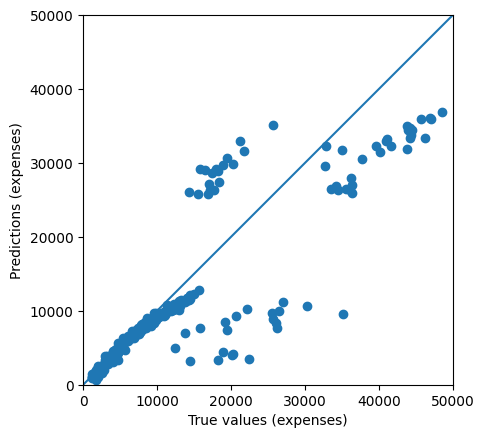

In [13]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
